In [50]:
#pip install category_encoders

In [51]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
import plotly.subplots as sp
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [52]:
df = pd.read_csv('port-traffic.csv')

In [53]:
df.shape

(270225, 6)

In [54]:
df.head()

,اسم المنفذ,التاريخ,اليوم,الساعة,الاتجاه,عدد الحركات
0,البطحاء,01-01-2020 12:00:00 AM,الاربعاء,0,قدوم,9
1,البطحاء,01-01-2020 12:00:00 AM,الاربعاء,0,مغادرة,32
2,البطحاء,01-01-2020 12:00:00 AM,الاربعاء,1,قدوم,45
3,البطحاء,01-01-2020 12:00:00 AM,الاربعاء,1,مغادرة,15
4,البطحاء,01-01-2020 12:00:00 AM,الاربعاء,2,قدوم,59


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270225 entries, 0 to 270224
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   اسم المنفذ   270225 non-null  object
 1   التاريخ      270225 non-null  object
 2   اليوم        270225 non-null  object
 3   الساعة       270225 non-null  int64 
 4   الاتجاه      270225 non-null  object
 5   عدد الحركات  270225 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 12.4+ MB


### تغير اسماء أعمدة  وقيمهم وحذف الغير ضرورية

In [56]:
df[['التاريخ2', 'التاريخ1' , "التاريخ"]] = df['التاريخ'].str.split(' ', expand=True) 

In [57]:
df = df.drop(['التاريخ1' , 'التاريخ'], axis=1)
df

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ2
0,البطحاء,الاربعاء,0,قدوم,9,01-01-2020
1,البطحاء,الاربعاء,0,مغادرة,32,01-01-2020
2,البطحاء,الاربعاء,1,قدوم,45,01-01-2020
3,البطحاء,الاربعاء,1,مغادرة,15,01-01-2020
4,البطحاء,الاربعاء,2,قدوم,59,01-01-2020
...,...,...,...,...,...,...
270220,سلوى,السبت,21,مغادرة,8,31-12-2022
270221,سلوى,السبت,22,قدوم,2,31-12-2022
270222,سلوى,السبت,22,مغادرة,1,31-12-2022
270223,سلوى,السبت,23,قدوم,2,31-12-2022


In [58]:
df.rename(columns = {"التاريخ2":"التاريخ"},inplace=True)
df

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
0,البطحاء,الاربعاء,0,قدوم,9,01-01-2020
1,البطحاء,الاربعاء,0,مغادرة,32,01-01-2020
2,البطحاء,الاربعاء,1,قدوم,45,01-01-2020
3,البطحاء,الاربعاء,1,مغادرة,15,01-01-2020
4,البطحاء,الاربعاء,2,قدوم,59,01-01-2020
...,...,...,...,...,...,...
270220,سلوى,السبت,21,مغادرة,8,31-12-2022
270221,سلوى,السبت,22,قدوم,2,31-12-2022
270222,سلوى,السبت,22,مغادرة,1,31-12-2022
270223,سلوى,السبت,23,قدوم,2,31-12-2022


In [59]:
df['التاريخ'] = pd.to_datetime(df['التاريخ'],errors='coerce')

In [60]:
df.describe()

,الساعة,عدد الحركات
count,270225.000000,270225.000000
mean,12.909953,24.873798
std,5.965685,25.848796
min,0.000000,1.000000
25%,9.000000,6.000000
50%,13.000000,17.000000
75%,18.000000,34.000000
max,23.000000,253.000000


In [61]:
df.isna().sum()

اسم المنفذ     0
اليوم          0
الساعة         0
الاتجاه        0
عدد الحركات    0
التاريخ        0
dtype: int64

In [62]:
# مجموع عدد الحركات

# مجموع عدد الحركات

In [63]:
total_movements = df['عدد الحركات'].sum()
total_movements

6721522

In [64]:
# عدد الحركات بناء على الاتجاه 

# عدد الحركات بناء على الاتجاه 

In [65]:
df["الاتجاه"].value_counts()

مغادرة    140957
قدوم      129268
Name: الاتجاه, dtype: int64

###  كل منفذ

In [66]:
df["اسم المنفذ"].value_counts()

البطحاء          51050
جسر الملك فهد    50730
الخفجي           36370
الحديثة          31222
الرقعي           28164
الوديعة          22457
سلوى             19236
جديدة عرعر       11656
الربع الخالي      9665
حالة عمار         6131
الدره             3544
Name: اسم المنفذ, dtype: int64

# منفذ البطحاء

In [67]:
batha = df.groupby('اسم المنفذ').get_group('البطحاء')
batha

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
0,البطحاء,الاربعاء,0,قدوم,9,2020-01-01
1,البطحاء,الاربعاء,0,مغادرة,32,2020-01-01
2,البطحاء,الاربعاء,1,قدوم,45,2020-01-01
3,البطحاء,الاربعاء,1,مغادرة,15,2020-01-01
4,البطحاء,الاربعاء,2,قدوم,59,2020-01-01
...,...,...,...,...,...,...
269934,البطحاء,السبت,21,مغادرة,83,2022-12-31
269935,البطحاء,السبت,22,قدوم,103,2022-12-31
269936,البطحاء,السبت,22,مغادرة,93,2022-12-31
269937,البطحاء,السبت,23,قدوم,52,2022-12-31


In [68]:
batha['الاتجاه'].value_counts()

قدوم      25635
مغادرة    25415
Name: الاتجاه, dtype: int64

In [69]:
batha['عدد الحركات'].max()

253

### اكثر عدد حركات في منفذ البطحاء

In [70]:
batha[batha['عدد الحركات'] == 212]

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
2492,البطحاء,الثلاثاء,19,قدوم,212,2020-01-14
14996,البطحاء,الخميس,16,قدوم,212,2020-03-19
15851,البطحاء,الثلاثاء,11,قدوم,212,2020-03-24
257552,البطحاء,الجمعة,8,مغادرة,212,2022-11-25


### 

# منفذ جسر الملك فهد

In [71]:
 king = df.groupby('اسم المنفذ').get_group('جسر الملك فهد')
 king

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
143,جسر الملك فهد,الاربعاء,0,قدوم,11,2020-01-01
144,جسر الملك فهد,الاربعاء,0,مغادرة,20,2020-01-01
145,جسر الملك فهد,الاربعاء,1,قدوم,31,2020-01-01
146,جسر الملك فهد,الاربعاء,1,مغادرة,35,2020-01-01
147,جسر الملك فهد,الاربعاء,2,قدوم,26,2020-01-01
...,...,...,...,...,...,...
270164,جسر الملك فهد,السبت,21,مغادرة,17,2022-12-31
270165,جسر الملك فهد,السبت,22,قدوم,10,2022-12-31
270166,جسر الملك فهد,السبت,22,مغادرة,19,2022-12-31
270167,جسر الملك فهد,السبت,23,قدوم,3,2022-12-31


In [72]:
king['الاتجاه'].value_counts()

قدوم      25367
مغادرة    25363
Name: الاتجاه, dtype: int64

In [73]:
king['عدد الحركات'].max()

136

### اكثر عدد حركات في منفذ جسر الملك فهد

In [74]:
king[king['عدد الحركات'] == 110]

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
7428,جسر الملك فهد,السبت,14,قدوم,110,2020-08-02
48815,جسر الملك فهد,الاحد,12,قدوم,110,2020-09-27


### 

#  الخفجي منفذ

In [75]:
khafji = df.groupby('اسم المنفذ').get_group('الخفجي')
khafji

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
71,الخفجي,الاربعاء,7,قدوم,24,2020-01-01
72,الخفجي,الاربعاء,7,مغادرة,12,2020-01-01
73,الخفجي,الاربعاء,8,قدوم,30,2020-01-01
74,الخفجي,الاربعاء,8,مغادرة,12,2020-01-01
75,الخفجي,الاربعاء,9,قدوم,14,2020-01-01
...,...,...,...,...,...,...
270007,الخفجي,السبت,21,مغادرة,21,2022-12-31
270008,الخفجي,السبت,22,قدوم,5,2022-12-31
270009,الخفجي,السبت,22,مغادرة,7,2022-12-31
270010,الخفجي,السبت,23,قدوم,6,2022-12-31


In [76]:
khafji['الاتجاه'].value_counts()

مغادرة    18767
قدوم      17603
Name: الاتجاه, dtype: int64

In [77]:
khafji['عدد الحركات'].max()

111

### اكثر عدد حركات في منفذ الخفجي

In [78]:
khafji[khafji['عدد الحركات'] == 108]

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
7341,الخفجي,السبت,17,مغادرة,108,2020-08-02


### 

#  منفذ الحديثة

In [79]:
alhaditha =df.groupby('اسم المنفذ').get_group('الحديثة')
alhaditha

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
47,الحديثة,الاربعاء,8,قدوم,27,2020-01-01
48,الحديثة,الاربعاء,8,مغادرة,83,2020-01-01
49,الحديثة,الاربعاء,9,قدوم,33,2020-01-01
50,الحديثة,الاربعاء,9,مغادرة,77,2020-01-01
51,الحديثة,الاربعاء,10,قدوم,50,2020-01-01
...,...,...,...,...,...,...
269963,الحديثة,السبت,19,مغادرة,30,2022-12-31
269964,الحديثة,السبت,20,مغادرة,10,2022-12-31
269965,الحديثة,السبت,21,مغادرة,30,2022-12-31
269966,الحديثة,السبت,22,مغادرة,23,2022-12-31


In [80]:
alhaditha['الاتجاه'].value_counts()

مغادرة    16332
قدوم      14890
Name: الاتجاه, dtype: int64

In [81]:
alhaditha['عدد الحركات'].max()

201

### اكثر عدد حركات في منفذ الحديثة

In [82]:
alhaditha[alhaditha['عدد الحركات'] == 132]

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
9069,الحديثة,الاثنين,18,قدوم,132,2020-02-17
234485,الحديثة,الثلاثاء,10,قدوم,132,2022-09-20


### 

#  منفذ الرقعي

In [83]:
alraqi = df.groupby('اسم المنفذ').get_group('الرقعي')
alraqi

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
103,الرقعي,الاربعاء,7,قدوم,19,2020-01-01
104,الرقعي,الاربعاء,8,قدوم,28,2020-01-01
105,الرقعي,الاربعاء,8,مغادرة,16,2020-01-01
106,الرقعي,الاربعاء,9,قدوم,63,2020-01-01
107,الرقعي,الاربعاء,9,مغادرة,26,2020-01-01
...,...,...,...,...,...,...
270082,الرقعي,السبت,19,مغادرة,1,2022-12-31
270083,الرقعي,السبت,20,قدوم,3,2022-12-31
270084,الرقعي,السبت,20,مغادرة,9,2022-12-31
270085,الرقعي,السبت,21,مغادرة,2,2022-12-31


In [84]:
alraqi['الاتجاه'].value_counts()

قدوم      14330
مغادرة    13834
Name: الاتجاه, dtype: int64

In [85]:
alraqi['عدد الحركات'].max()

186

###  اكثر عدد حركات في منفذ الرقعي

In [86]:
alraqi[alraqi['عدد الحركات'] == 186]

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
3513,الرقعي,الاحد,12,قدوم,186,2020-01-19


### 

 #  منفذ الوديعة

In [87]:
alwadia = df.groupby('اسم المنفذ').get_group('الوديعة')
alwadia

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
126,الوديعة,الاربعاء,9,قدوم,54,2020-01-01
127,الوديعة,الاربعاء,10,قدوم,30,2020-01-01
128,الوديعة,الاربعاء,10,مغادرة,31,2020-01-01
129,الوديعة,الاربعاء,11,مغادرة,9,2020-01-01
130,الوديعة,الاربعاء,12,قدوم,10,2020-01-01
...,...,...,...,...,...,...
270105,الوديعة,السبت,20,قدوم,18,2022-12-31
270106,الوديعة,السبت,20,مغادرة,1,2022-12-31
270107,الوديعة,السبت,21,مغادرة,22,2022-12-31
270108,الوديعة,السبت,22,مغادرة,11,2022-12-31


In [88]:
alwadia['الاتجاه'].value_counts()

مغادرة    14618
قدوم       7839
Name: الاتجاه, dtype: int64

In [89]:
alwadia['عدد الحركات'].max()

107

###  اكثر عدد حركات في منفذ الوديعة

In [90]:
alwadia[alwadia['عدد الحركات'] == 103]

,اسم المنفذ,اليوم,الساعة,الاتجاه,عدد الحركات,التاريخ
6622,الوديعة,الثلاثاء,15,قدوم,103,2020-04-02


### 

In [91]:
df['الشهر'] = df['التاريخ'].dt.month

In [92]:
df['السنه']=df['التاريخ'].dt.year

In [93]:
monthly_counts=df.groupby(['السنه','الشهر'])['عدد الحركات'].sum().reset_index()

In [94]:
monthly_counts

,السنه,الشهر,عدد الحركات
0,2020,1,174669
1,2020,2,169455
2,2020,3,155193
3,2020,4,111992
4,2020,5,100696
5,2020,6,130625
6,2020,7,137016
7,2020,8,152123
8,2020,9,162117
9,2020,10,171416


### Data Visualization

### عدد الحركات في كل منفذ

In [95]:
port_counts = df['اسم المنفذ'].value_counts()
fig =px.bar(x=port_counts.index,y=port_counts.values,labels={'x':'اسم المنفذ','y':'عدد الحركات'},
title="عدد الحركات في كل منفذ", color_discrete_sequence=['#2ad2c9'])
fig.update_layout(
    plot_bgcolor='white'
)
fig.show()

### عدد اتجاهات القدوم والمغادرة لكل منفذ

In [96]:
grouped_data1 = df.groupby(['اسم المنفذ', 'الاتجاه'])['عدد الحركات'].sum().reset_index()
fig = go.Figure()

fig.add_trace(go.Bar( x=grouped_data1[grouped_data1['الاتجاه'] == 'قدوم']['اسم المنفذ'],
                     y=grouped_data1[grouped_data1['الاتجاه'] == 'قدوم']['عدد الحركات'],
                     name='قدوم', marker_color='#2ad2c9'))
 
fig.add_trace(go.Bar( x=grouped_data1[grouped_data1['الاتجاه'] == 'مغادرة']['اسم المنفذ'],
                     y=grouped_data1[grouped_data1['الاتجاه'] == 'مغادرة']['عدد الحركات'], 
                     name='مغادرة',  marker_color='#9be0de'))
  
fig.update_layout( title='عدد اتجاهات القدوم والمغادرة لكل منفذ',
                  xaxis_title='اسم المنفذ',
                  yaxis_title='عدد الحركات', 
                  barmode='group',
                  plot_bgcolor='white')
  

fig.show()





In [97]:
pd.pivot_table(data=df,index="اسم المنفذ",columns="الاتجاه",
values="عدد الحركات",aggfunc=np.sum,margins=True)

الاتجاه,قدوم,مغادرة,All
اسم المنفذ,,,
البطحاء,1436012,1402726,2838738
الحديثة,528994,531616,1060610
الخفجي,328846,373968,702814
الدره,2945,7570,10515
الربع الخالي,24504,29950,54454
الرقعي,274880,226769,501649
الوديعة,166312,195208,361520
جديدة عرعر,21124,21138,42262
جسر الملك فهد,499206,489314,988520


### إضافة اعمدة جديده

In [98]:
outlet_trends = {}
for outlet in df['اسم المنفذ'].unique():
    outlet_df = df[df['اسم المنفذ'] == outlet]
    outlet_df = outlet_df.sort_values('التاريخ')
    outlet_df['حركات_التغيير'] = outlet_df['عدد الحركات'].diff()
    trend = 'زيادة' if outlet_df['حركات_التغيير'].mean() > 0 else 'انخفاض' if outlet_df['حركات_التغيير'].mean() < 0 else 'ثبات'
    outlet_trends[outlet] = trend

In [99]:
df['اتجاه الحركات'] = df['اسم المنفذ'].map(outlet_trends)

In [100]:
df['عطلة/يوم'] = ''


for index, row in df.iterrows():
    movement_date = row['التاريخ']  
    day_of_week = movement_date.dayofweek 
    if day_of_week >= 4: 
        df.at[index, 'عطلة/يوم'] = 'نهايةالاسبوع'
    else:
        df.at[index, 'عطلة/يوم'] = 'يوم الاسبوع'

### Encoding

In [101]:
df['اتجاه الحركات'].value_counts()

انخفاض    178608
زيادة      62706
ثبات       28911
Name: اتجاه الحركات, dtype: int64

In [102]:
le = preprocessing.LabelEncoder()
#df['اتجاه الحركات'] = le.fit_transform(df['اتجاه الحركات'])
df['اتجاه الحركات'].value_counts()

انخفاض    178608
زيادة      62706
ثبات       28911
Name: اتجاه الحركات, dtype: int64

In [103]:
df['عطلة/يوم'].value_counts()

يوم الاسبوع     155651
نهايةالاسبوع    114574
Name: عطلة/يوم, dtype: int64

In [104]:
df['عطلة/يوم'] = le.fit_transform(df['عطلة/يوم'])
df['عطلة/يوم'].value_counts()

1    155651
0    114574
Name: عطلة/يوم, dtype: int64

In [105]:
df["الاتجاه"].value_counts()

مغادرة    140957
قدوم      129268
Name: الاتجاه, dtype: int64

In [106]:
df["الاتجاه"] = le.fit_transform(df["الاتجاه"])
df["الاتجاه"].value_counts()

1    140957
0    129268
Name: الاتجاه, dtype: int64

In [107]:
df["اسم المنفذ"].value_counts()

البطحاء          51050
جسر الملك فهد    50730
الخفجي           36370
الحديثة          31222
الرقعي           28164
الوديعة          22457
سلوى             19236
جديدة عرعر       11656
الربع الخالي      9665
حالة عمار         6131
الدره             3544
Name: اسم المنفذ, dtype: int64

In [108]:
df["اسم المنفذ"] = le.fit_transform(df["اسم المنفذ"])
df["اسم المنفذ"].value_counts()

0     51050
8     50730
2     36370
1     31222
5     28164
6     22457
10    19236
7     11656
4      9665
9      6131
3      3544
Name: اسم المنفذ, dtype: int64

In [109]:
df["اليوم"].value_counts()

الخميس      39360
الاربعاء    39280
الثلاثاء    39028
الاثنين     38652
الاحد       38201
الجمعة      37944
السبت       37760
Name: اليوم, dtype: int64

In [110]:
df["اليوم"] = le.fit_transform(df["اليوم"])
df["اليوم"].value_counts()

5    39360
2    39280
3    39028
0    38652
1    38201
4    37944
6    37760
Name: اليوم, dtype: int64

In [111]:
df["السنه"].value_counts()

2022    117509
2021     85562
2020     67154
Name: السنه, dtype: int64

In [112]:
#df["السنه"] = le.fit_transform(df["السنه"])
df["السنه"].value_counts()

2022    117509
2021     85562
2020     67154
Name: السنه, dtype: int64

In [113]:
df["الساعة"].value_counts()

10    16178
11    15913
9     15634
12    15476
16    15273
13    15257
17    15199
14    14864
15    14329
18    14021
8     13484
19    13316
20    12748
21    11986
22    10395
7      9443
23     7611
0      6487
1      6219
2      5586
6      5427
3      5177
5      5172
4      5030
Name: الساعة, dtype: int64

### تقسيم البيانات

In [114]:
df = df.sample(n=50000, random_state=42)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 175742 to 122376
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   اسم المنفذ     50000 non-null  int64         
 1   اليوم          50000 non-null  int64         
 2   الساعة         50000 non-null  int64         
 3   الاتجاه        50000 non-null  int64         
 4   عدد الحركات    50000 non-null  int64         
 5   التاريخ        50000 non-null  datetime64[ns]
 6   الشهر          50000 non-null  int64         
 7   السنه          50000 non-null  int64         
 8   اتجاه الحركات  50000 non-null  object        
 9   عطلة/يوم       50000 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 4.2+ MB


In [116]:
x = df.drop(['اتجاه الحركات','التاريخ' ,'السنه'], axis=1)

# 'y' should remain unchanged as the target column
y = df['اتجاه الحركات']

In [117]:
df['اتجاه الحركات'].value_counts()

انخفاض    32836
زيادة     11722
ثبات       5442
Name: اتجاه الحركات, dtype: int64

In [118]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 175742 to 122376
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   اسم المنفذ   50000 non-null  int64
 1   اليوم        50000 non-null  int64
 2   الساعة       50000 non-null  int64
 3   الاتجاه      50000 non-null  int64
 4   عدد الحركات  50000 non-null  int64
 5   الشهر        50000 non-null  int64
 6   عطلة/يوم     50000 non-null  int64
dtypes: int64(7)
memory usage: 3.1 MB


In [119]:
n_samples = 50000
n_features = 10
n_classes = 3

x, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes,
                           weights=[0.95, 0.025, 0.025], n_clusters_per_class=1, random_state=42)

In [120]:
#split the data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [121]:
x_train.shape

(35000, 10)

In [122]:
x_test.shape

(15000, 10)

## Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

### Imbalanced Data

In [124]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

In [125]:
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [126]:
predictions_rfc = RFC.predict(x_test)

In [127]:
#rcf=plot_confusion_matrix(RFC, x_test, y_test);
print('Imbalanced Data\n')
print(classification_report(y_test, predictions_rfc))

Imbalanced Data

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14165
           1       0.98      0.85      0.91       424
           2       0.97      0.85      0.91       411

    accuracy                           0.99     15000
   macro avg       0.98      0.90      0.94     15000
weighted avg       0.99      0.99      0.99     15000



### Oversampling

In [128]:
oversampler_rf = RandomOverSampler(sampling_strategy='auto', random_state=42)

In [129]:
x_train_resampled, y_train_resampled = oversampler_rf.fit_resample(x_train, y_train)

In [130]:
RFCove = RandomForestClassifier(random_state=42)

In [131]:
RFCove.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [132]:
predictions_rov = RFCove.predict(x_test)

In [133]:
print('\tOversampling Technique \n')
print(classification_report(y_test, predictions_rov))

	Oversampling Technique 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14165
           1       0.98      0.85      0.91       424
           2       0.97      0.85      0.91       411

    accuracy                           0.99     15000
   macro avg       0.98      0.90      0.94     15000
weighted avg       0.99      0.99      0.99     15000



### Undersampling

In [134]:
undersampler_rf = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [135]:
x_train_un, y_train_un = undersampler_rf.fit_resample(x_train, y_train)

In [136]:
RFC_und = RandomForestClassifier(random_state=42)

In [137]:
RFC_und.fit(x_train_un, y_train_un)

RandomForestClassifier(random_state=42)

In [138]:
predictions_rud= RFC_und.predict(x_test)

In [139]:
print('\tUndersampling Technique \n')
print(classification_report(y_test, predictions_rud))

	Undersampling Technique 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14165
           1       0.57      0.87      0.69       424
           2       0.95      0.85      0.90       411

    accuracy                           0.97     15000
   macro avg       0.84      0.90      0.86     15000
weighted avg       0.98      0.97      0.98     15000



### SMOTE

In [140]:
smote_rf = SMOTE(sampling_strategy='auto', random_state=42)

In [141]:
x_train_sm, y_train_sm = smote_rf.fit_resample(x_train, y_train)

In [142]:
RFC_smote = RandomForestClassifier(random_state=42)

In [143]:
RFC_smote.fit(x_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [144]:
predictions_rsm = RFC_smote.predict(x_test)

In [145]:
print('SMOTE (Synthetic Minority Over-sampling Technique)\n')
print(classification_report(y_test, predictions_rsm))

SMOTE (Synthetic Minority Over-sampling Technique)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14165
           1       0.94      0.86      0.89       424
           2       0.93      0.86      0.89       411

    accuracy                           0.99     15000
   macro avg       0.95      0.90      0.93     15000
weighted avg       0.99      0.99      0.99     15000



## Support Vector Machines (SVM) Classifier

In [146]:
from sklearn.svm import SVC

In [147]:
svm = SVC(random_state=42)

In [148]:
svm.fit(x_train, y_train)

SVC(random_state=42)

In [149]:
predictions_sv = svm.predict(x_test)

In [150]:
print("Imbalanced Data\n")
print(classification_report(y_test, predictions_sv))

Imbalanced Data

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14165
           1       0.99      0.81      0.89       424
           2       0.97      0.84      0.90       411

    accuracy                           0.99     15000
   macro avg       0.99      0.89      0.93     15000
weighted avg       0.99      0.99      0.99     15000



### Oversampling

In [151]:
oversampler_svm = RandomOverSampler(sampling_strategy='auto', random_state=42)

In [152]:
x_resampled, y_resampled = oversampler_svm.fit_resample(x_train, y_train)

In [153]:
svm_ovr = SVC(random_state=42)

In [154]:
svm_ovr.fit(x_resampled, y_resampled)

SVC(random_state=42)

In [155]:
predictions_sov = svm_ovr.predict(x_test)

In [156]:
print('\tOversampling Technique \n')
print(classification_report(y_test, predictions_sov))

	Oversampling Technique 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14165
           1       0.58      0.84      0.69       424
           2       0.95      0.85      0.90       411

    accuracy                           0.97     15000
   macro avg       0.84      0.89      0.86     15000
weighted avg       0.98      0.97      0.98     15000



### Undersampling

In [157]:
undersampler_svm = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [158]:
x_resampled, y_resampled = undersampler_svm.fit_resample(x_train, y_train)

In [159]:
svm_und = SVC(random_state=42)

In [160]:
svm_und.fit(x_resampled, y_resampled)

SVC(random_state=42)

In [161]:
predictions_sud = svm_und.predict(x_test)

In [162]:
print("\tUndersampling Technique \n:")
print(classification_report(y_test, predictions_sud))

	Undersampling Technique 
:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14165
           1       0.51      0.85      0.64       424
           2       0.97      0.86      0.91       411

    accuracy                           0.97     15000
   macro avg       0.82      0.89      0.84     15000
weighted avg       0.98      0.97      0.97     15000



### SMOTE

In [163]:
smote_svm = SMOTE(sampling_strategy='auto', random_state=42)

In [164]:
x_resampled, y_resampled = smote_svm.fit_resample(x_train, y_train)

In [165]:
svm_sm = SVC(random_state=42)

In [166]:
svm_sm.fit(x_resampled, y_resampled)

SVC(random_state=42)

In [167]:
predictions_vsm = svm_sm.predict(x_test)

In [168]:
print("SVM with SMOTE:")
print(classification_report(y_test, predictions_vsm))

SVM with SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14165
           1       0.59      0.84      0.70       424
           2       0.96      0.85      0.90       411

    accuracy                           0.98     15000
   macro avg       0.85      0.89      0.86     15000
weighted avg       0.98      0.98      0.98     15000



## Ensemble Methods (Boosting)

In [169]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [170]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

### AdaBoost

In [171]:
boosted_adaboost = AdaBoostClassifier(random_state=42)

In [172]:
boosted_adaboost.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [173]:
predictions = boosted_adaboost.predict(x_test)

In [174]:
print("Boosted (AdaBoost)")
print(classification_report(y_test, predictions))

Boosted (AdaBoost)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14165
           1       0.98      0.81      0.89       424
           2       0.99      0.83      0.90       411

    accuracy                           0.99     15000
   macro avg       0.99      0.88      0.93     15000
weighted avg       0.99      0.99      0.99     15000



### XGBoost

In [175]:
boosted_xgboost = XGBClassifier(random_state=42)

In [176]:
boosted_xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [177]:
predictions = boosted_xgboost.predict(x_test)

In [178]:
print("Boosted (XGBoost) :")
print(classification_report(y_test, predictions))

Boosted (XGBoost) :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     14165
           1       0.98      0.85      0.91       424
           2       0.97      0.84      0.90       411

    accuracy                           0.99     15000
   macro avg       0.98      0.90      0.94     15000
weighted avg       0.99      0.99      0.99     15000



In [179]:
from sklearn.metrics import accuracy_score
from plotly.subplots import make_subplots

In [180]:
classifiers = [
    ('RFC', RFC),
    ('Oversampled RFC', RFCove),
    ('Undersampled RFC', svm_und),
    ('SMOTE RFC', svm_sm),
    ('SVM', svm),
    ('Oversampled SVM', svm_ovr),
    ('Undersampled SVM', svm_und),
    ('SMOTE SVM', svm_sm),
    ('AdaBoost', boosted_adaboost),
    ('XGBoost', boosted_xgboost),
]

accuracy_scores = [accuracy_score(y_test, clf.predict(x_test)) for _, clf in classifiers]

model_names = [name for name, _ in classifiers]

fig = px.line(x=model_names, y=accuracy_scores, markers=True, line_shape='linear',
              color_discrete_sequence=['#2ad2c9'] * len(classifiers))

fig.update_layout(
    title='Classifier Accuracy Comparison',
    xaxis_title='Classifier',
    yaxis_title='Accuracy', plot_bgcolor='white'
)

fig.show()


In [181]:
precision_scores = []
recall_scores = []
f1_scores = []
model_names = []

for model_name, model in classifiers:
    predictions = model.predict(x_test)
    report = classification_report(y_test, predictions, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    model_names.append(model_name)

fig = make_subplots(rows=1, cols=1)


fig.add_trace(go.Scatter(x=model_names, y=precision_scores, mode='lines+markers', name='Precision', marker_color='#2ad2c9'))
fig.add_trace(go.Scatter(x=model_names, y=recall_scores,mode='lines+markers', name='Recall', marker_color='#1AB7B2'))
fig.add_trace(go.Scatter(x=model_names, y=f1_scores, mode='lines+markers',name='F1-Score', marker_color='#81C4C1'))


fig.update_xaxes(title_text='Model', tickangle=-45)
fig.update_yaxes(title_text='Score', title_font=dict(size=14))


fig.update_layout(
    title='Model Metric Comparison',
    barmode='group',
    height=500,
    width=1000,
    legend=dict(x=0, y=1.15) ,plot_bgcolor='white'
)


fig.show()


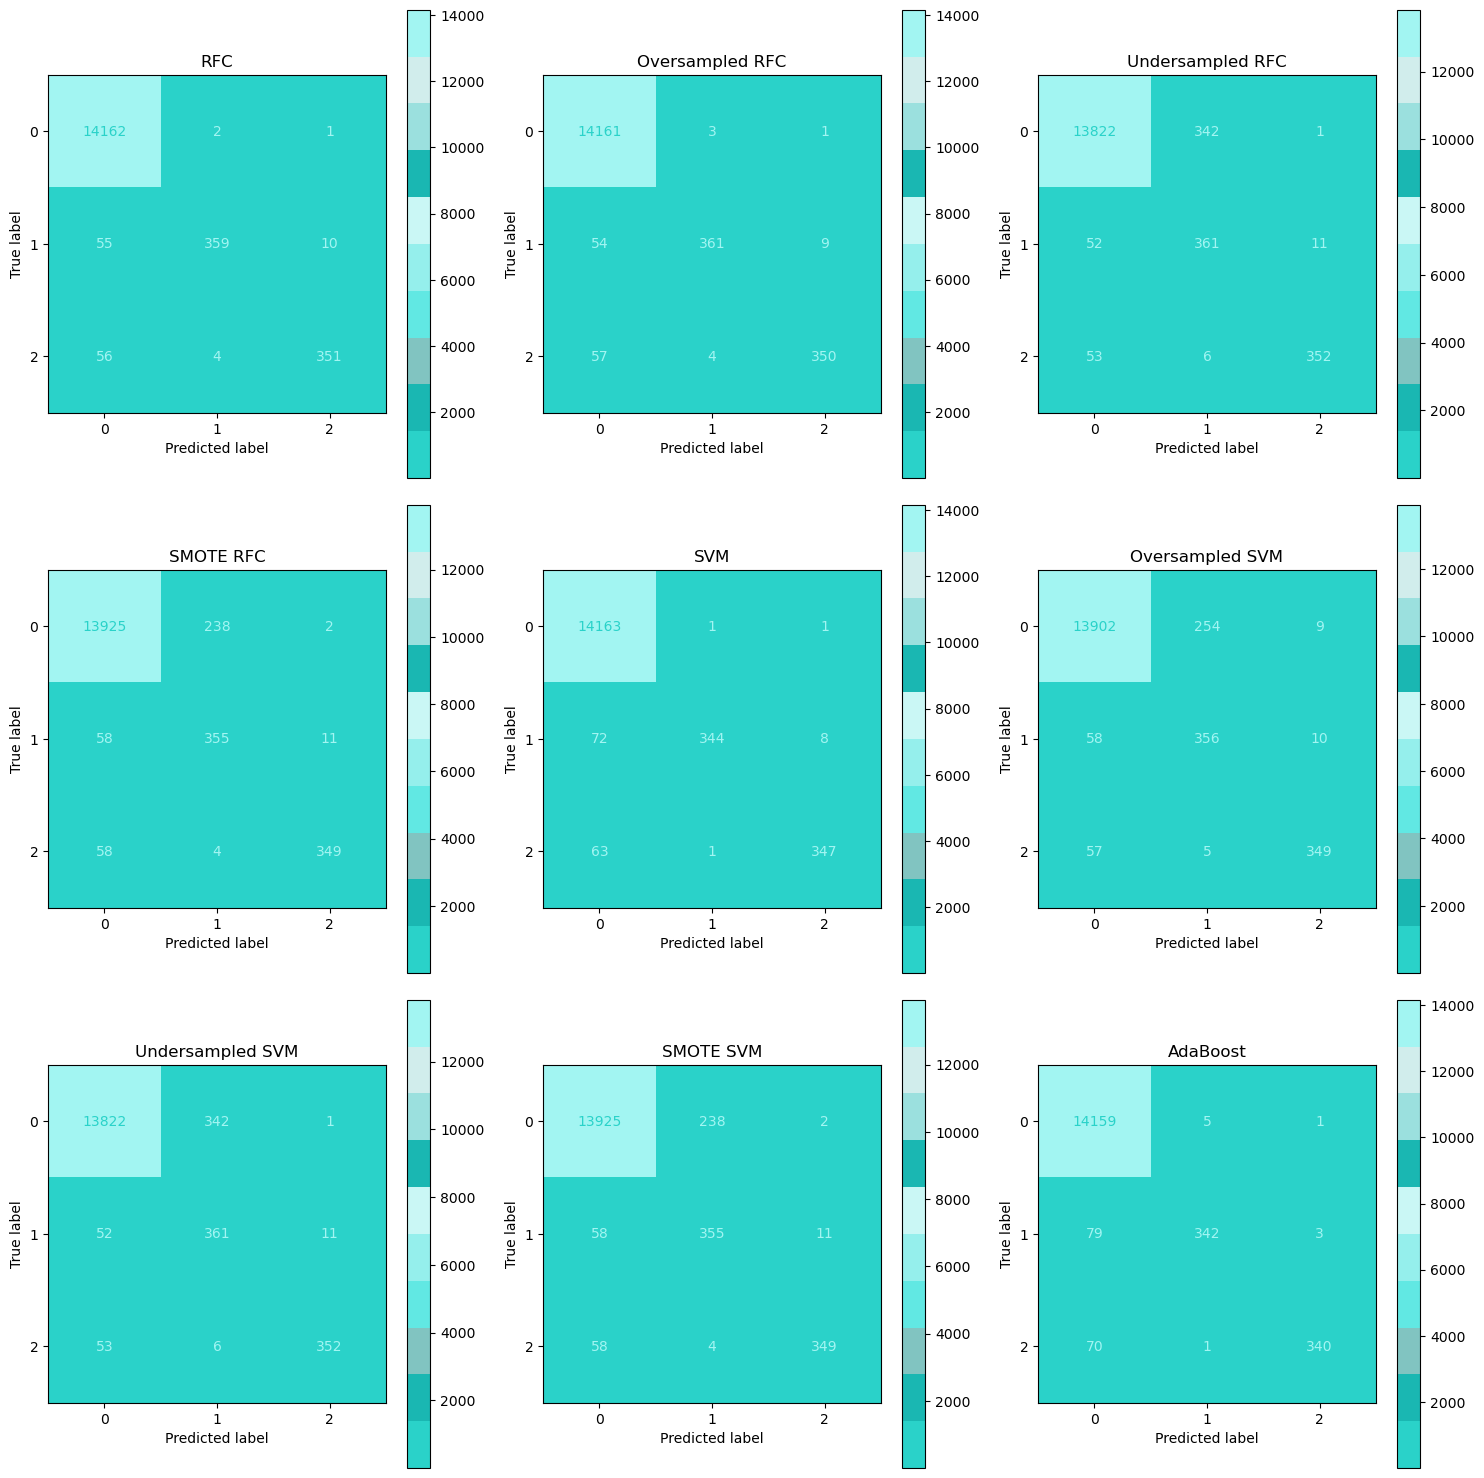

In [182]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import plot_confusion_matrix

distinct_colors = ['#2ad2c9', '#1AB7B2', '#81C4C1', '#61E8E3', '#95EFEC', '#CAF7F5', '#1AB7B2', '#9be0de', '#d1edec', '#a2f5f2']

cmap = LinearSegmentedColormap.from_list('distinct_cmap', distinct_colors, N=len(classifiers))

classifiers = [
    ('RFC', RFC),
    ('Oversampled RFC', RFCove),  
    ('Undersampled RFC', svm_und), 
    ('SMOTE RFC', svm_sm),  
    ('SVM', svm),
    ('Oversampled SVM', svm_ovr),  
    ('Undersampled SVM', svm_und),  
    ('SMOTE SVM', svm_sm),  
    ('AdaBoost', boosted_adaboost),
    ('XGBoost', boosted_xgboost),
]


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for (name, clf), ax in zip(classifiers, axes.ravel()):
    plot_confusion_matrix(clf, x_test, y_test, ax=ax ,cmap=cmap, display_labels=[0, 1, 2])
    ax.set_title(name)

plt.tight_layout()
plt.show()

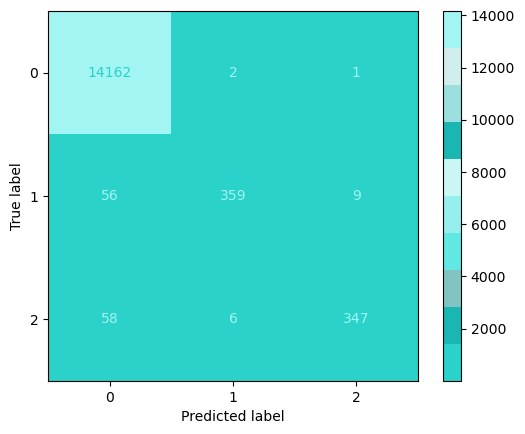

In [183]:
distinct_colors = ['#2ad2c9', '#1AB7B2', '#81C4C1', '#61E8E3', '#95EFEC', '#CAF7F5', '#1AB7B2', '#9be0de', '#d1edec', '#a2f5f2']

cmap = LinearSegmentedColormap.from_list('distinct_cmap', distinct_colors, N=len(classifiers))

plot_confusion_matrix(boosted_xgboost, x_test, y_test, cmap=cmap, display_labels=[0, 1, 2])
plt.show()